In [1]:
import numpy as np
import pandas as pd
import pickle
import joblib

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("C:/Users/91812/cardio_train.csv",sep=';')

df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,989,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,990,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,991,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,992,23393,1,155,62.0,120,80,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69296,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69297,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69298,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69299,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [3]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000
mean,50471.480397,19468.786280,1.349519,164.362217,74.203027,128.829584,96.650092,1.366806,1.226447,0.088051,0.053881,0.803986,0.499589
std,28563.100347,2467.261818,0.476821,8.205337,14.383469,154.775805,189.096240,0.680270,0.572246,0.283371,0.225784,0.396982,0.500003
min,988.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25745.000000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50494.000000,19704.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,75150.000000,21326.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
df.isna().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [5]:
df.dtypes

id               int64
age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

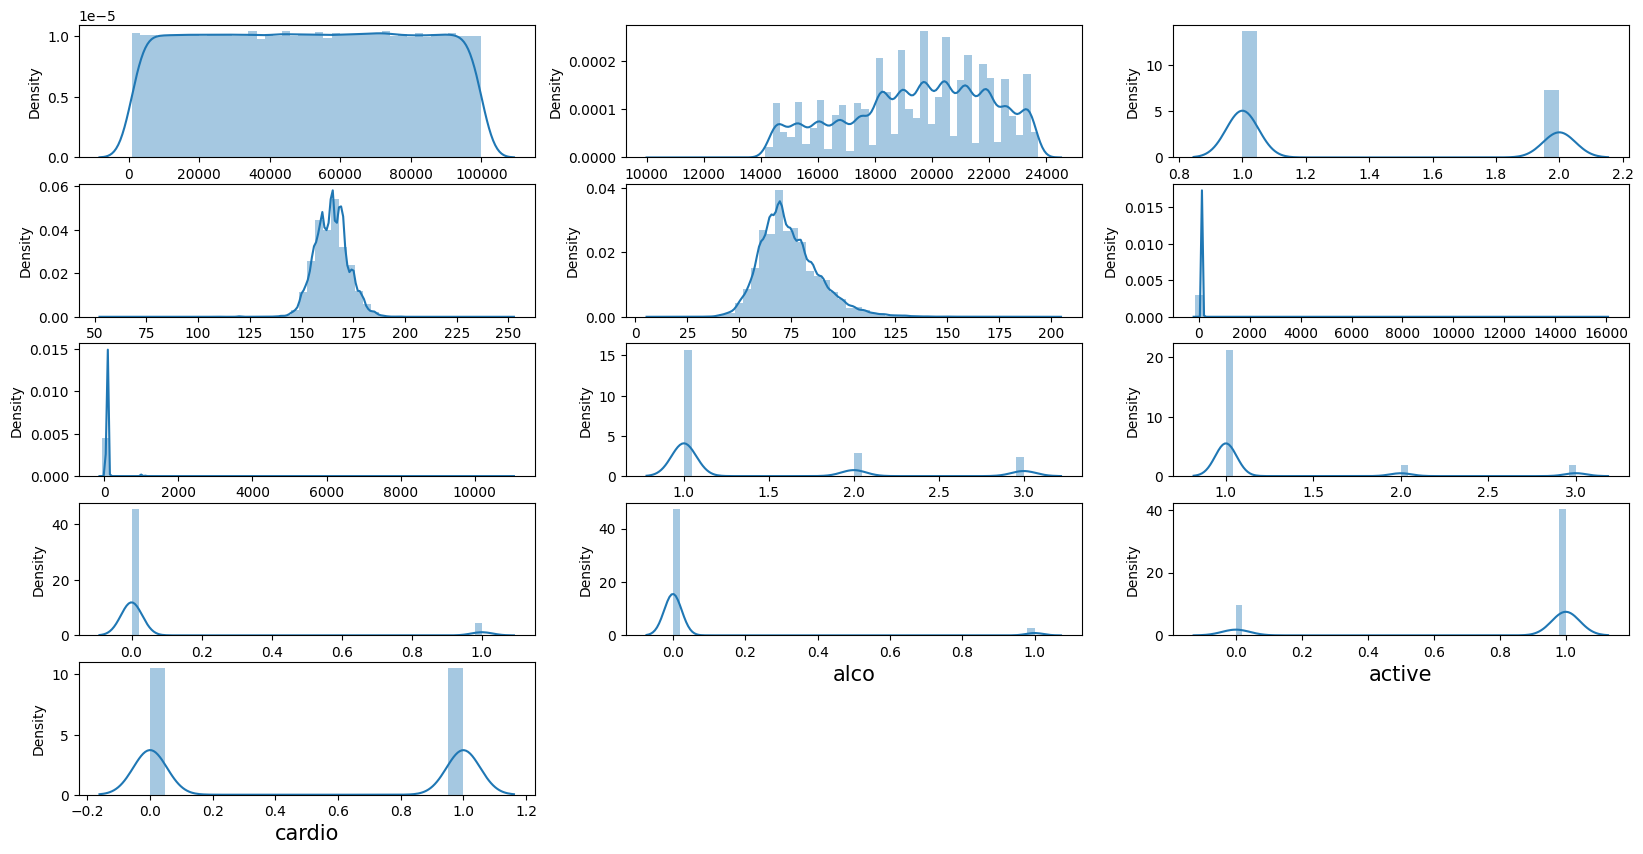

In [7]:
plt.figure(figsize=(20,10))
plotnumber=1

for column in df:
    if plotnumber <= 15:
        ax = plt.subplot(5,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.show()

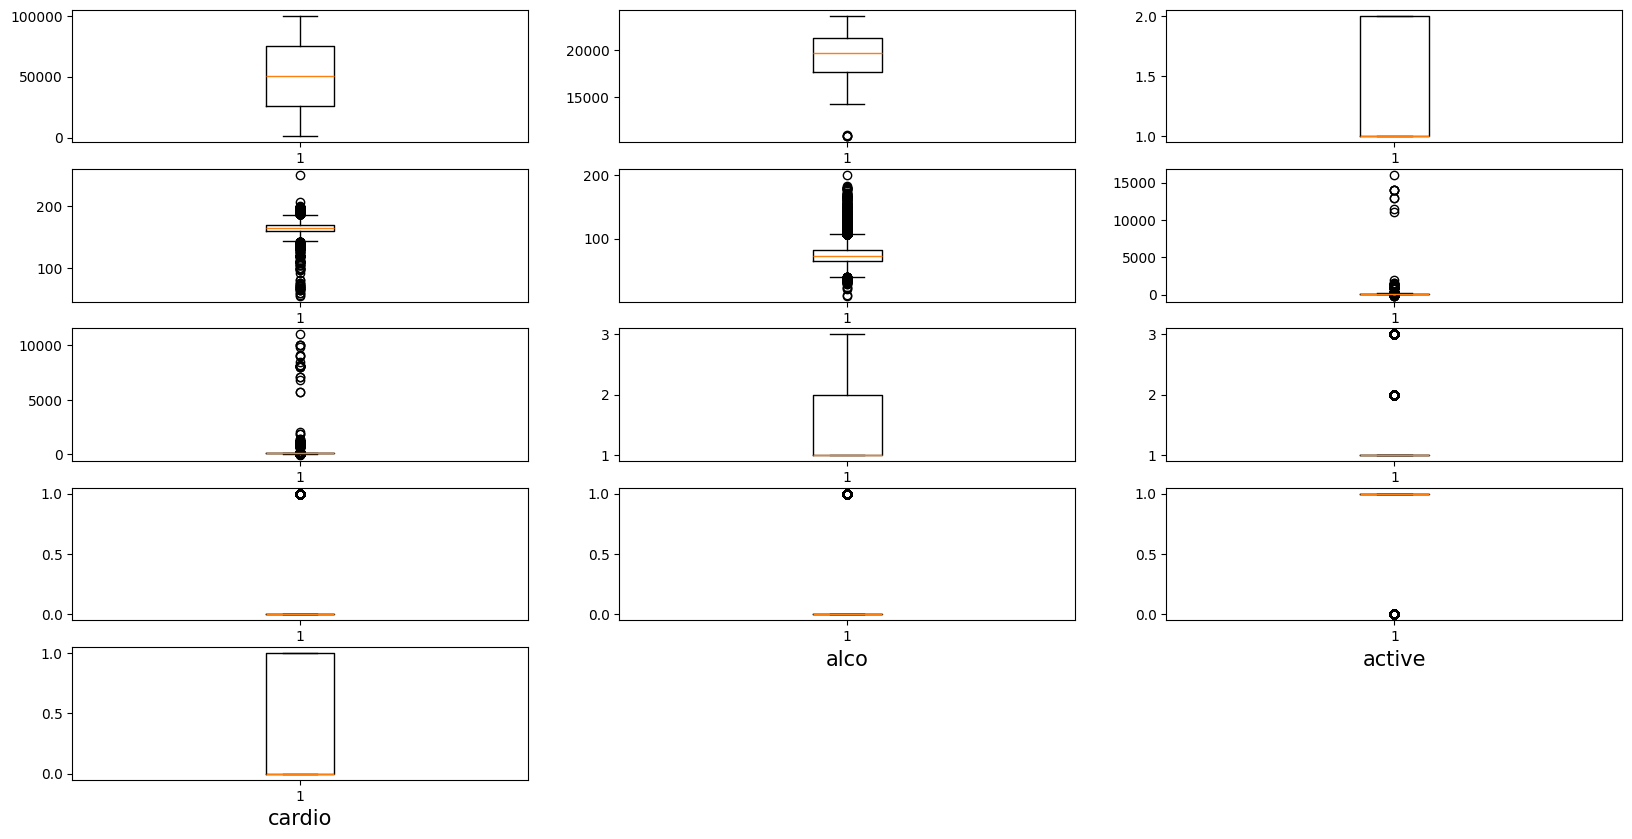

In [8]:
plt.figure(figsize=(20,10))
plotnumber=1

for column in df:
    if plotnumber <= 15:
        ax = plt.subplot(5,3,plotnumber)
        plt.boxplot(df[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.show()

In [9]:
x = df.drop(columns='cardio')

y = df['cardio']

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
scaler = StandardScaler()

x_scaled = scaler.fit_transform(x)

In [12]:
pickle.dump(scaler,open('scaler.pkl','wb'))

In [13]:
x_scaled

array([[-1.73243929,  1.21601824, -0.73302344, ..., -0.31072844,
        -0.23864069,  0.49376463],
       [-1.73240428, -1.95391548, -0.73302344, ..., -0.31072844,
        -0.23864069,  0.49376463],
       [-1.73236927,  0.98580185, -0.73302344, ..., -0.31072844,
        -0.23864069,  0.49376463],
       ...,
       [ 1.7338761 , -0.16325352,  1.36421285, ..., -0.31072844,
         4.19040018, -2.02525646],
       [ 1.73394612,  1.20061644, -0.73302344, ..., -0.31072844,
        -0.23864069, -2.02525646],
       [ 1.73398113,  0.43417421, -0.73302344, ..., -0.31072844,
        -0.23864069,  0.49376463]])

In [14]:
x_scaled.shape[1]

12

In [15]:
# checking multicollinearity using vif

# from statsmodels.stats.outliers_influence import variance_inflation_factor 

# vif = pd.DataFrame()

# vif['vif'] = [variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]

# vif['features'] = x.columns

# vif

# if values of all columns come less than 5, we need not to delete any column

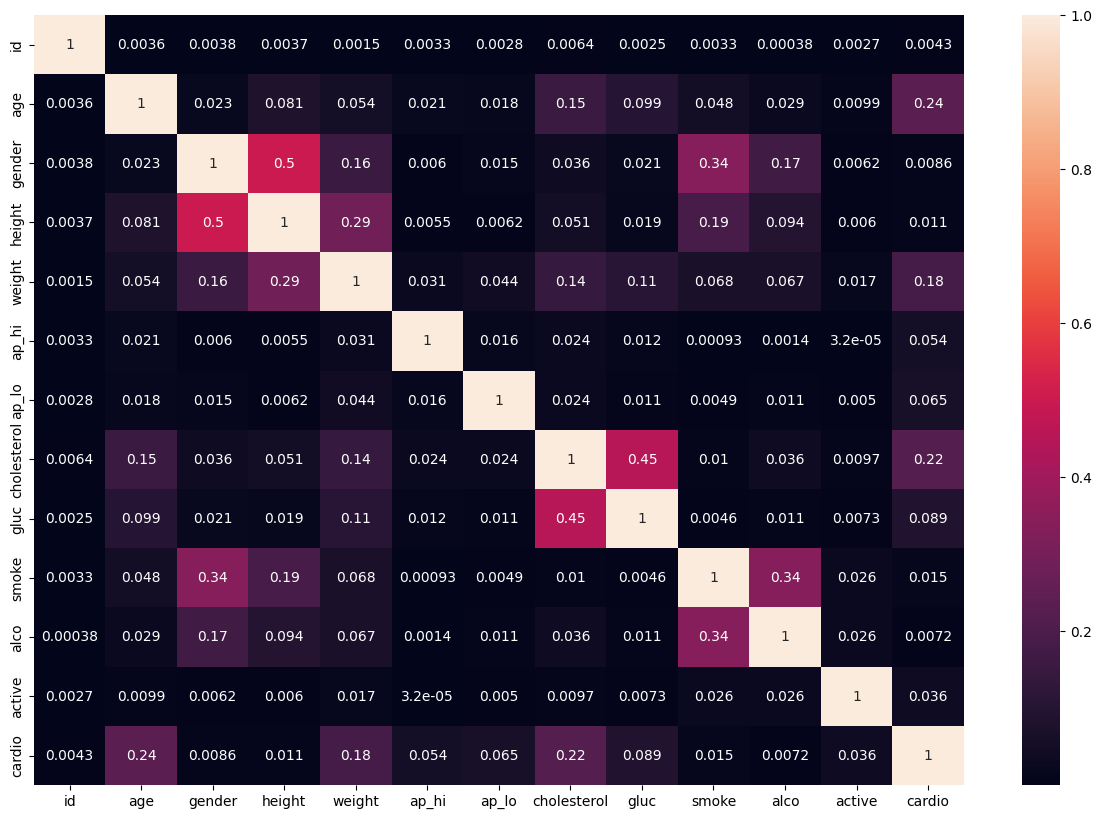

In [16]:
df_corr = df.corr().abs()

plt.figure(figsize=(15,10))
sns.heatmap(df_corr, annot=True, annot_kws={'size':10})
plt.show()

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.25)

In [19]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
lr = LogisticRegression()

lr.fit(x_train,y_train)

LogisticRegression()

In [22]:
lr_pred = lr.predict(x_test)

In [23]:
lr_pred

array([0, 0, 1, ..., 1, 0, 0])

In [24]:
accuracy = accuracy_score(y_test,lr_pred)

accuracy

0.7193812766939859

In [25]:
confusion_matrix(y_test,lr_pred)

array([[6583, 2121],
       [2741, 5881]])

In [26]:
from sklearn.tree import DecisionTreeClassifier

In [27]:
dt = DecisionTreeClassifier()

dt.fit(x_train,y_train)

dt_pred = dt.predict(x_test)

In [28]:
accuracy = accuracy_score(y_test,dt_pred)

accuracy

0.6351725730116587

In [29]:
confusion_matrix(y_test,dt_pred)

array([[5499, 3205],
       [3116, 5506]])

In [30]:
from sklearn.ensemble import RandomForestClassifier

In [31]:
rf = RandomForestClassifier()

rf.fit(x_train,y_train)

rf_pred = rf.predict(x_test)

In [32]:
accuracy = accuracy_score(y_test,rf_pred)

accuracy

0.7252683827773289

In [33]:
confusion_matrix(y_test,rf_pred)

array([[6513, 2191],
       [2569, 6053]])

In [34]:
pickle.dump(lr,open('LR_CardioML.pkl','wb'))

In [37]:
 #type(lr)
# type(scaler)

sklearn.linear_model._logistic.LogisticRegression